In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [90]:
import os
import numpy as np
import pandas as pd
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from sklearn.utils import resample


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
df = pd.read_csv("/content/gdrive/MyDrive/BOAZ/mini_pj2/data/Loan.csv")
print(df.isnull().sum())
df.head()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [92]:
df = df.drop('ApplicationDate',axis=1)

# 20~30대만 필터링 (20 <= Age <= 39)
df = df[(df['Age'] >= 20) & (df['Age'] <= 39)]

# 1. 각 클래스별 데이터 분리
approved_df = df[df['LoanApproved'] == 1]
not_approved_df = df[df['LoanApproved'] == 0]

# 2. 소수 클래스 수에 맞춰 다운샘플링
min_count = min(len(approved_df), len(not_approved_df))

approved_downsampled = resample(approved_df,
                                replace=False,  # 복원 추출 여부
                                n_samples=min_count,  # 소수 클래스 샘플 수
                                random_state=42)

not_approved_downsampled = resample(not_approved_df,
                                    replace=False,
                                    n_samples=min_count,
                                    random_state=42)

# 3. 다운샘플링된 데이터 합치기
balanced_df = pd.concat([approved_downsampled, not_approved_downsampled])

# 4. 데이터 섞기 (선택 사항)
df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,31,37019,629,Employed,Associate,8,35642,108,Married,3,...,3084.916667,0.873135,2,8764,0.266142,0.271090,884.404247,0.376478,0,52.0
1,37,116188,564,Employed,Master,13,25360,12,Divorced,2,...,9682.333333,0.898521,4,23562,0.208360,0.166688,2308.968380,0.315623,1,44.0
2,32,140693,550,Employed,Bachelor,10,20151,72,Married,3,...,11724.416667,0.764826,2,16133,0.260151,0.249715,542.458313,0.070064,1,44.8
3,31,35729,587,Unemployed,Master,8,37193,36,Single,3,...,2977.416667,0.920229,6,4426,0.228693,0.228503,1436.830727,0.561840,0,59.0
4,37,66498,541,Employed,Master,15,19238,120,Married,3,...,5541.500000,0.712179,5,36429,0.303738,0.251823,440.125754,0.216571,1,40.0


> 변수설명

- **ApplicationDate**: 대출 신청 날짜  
- **Age**: 신청자의 나이  
- **AnnualIncome**: 연 소득  
- **CreditScore**: 신용 점수  
- **EmploymentStatus**: 고용 상태  
- **EducationLevel**: 학력 수준  
- **Experience**: 근무 경력  
- **LoanAmount**: 요청한 대출 금액  
- **LoanDuration**: 대출 상환 기간  
- **MaritalStatus**: 신청자의 결혼 상태  
- **NumberOfDependents**: 부양 가족 수  
- **HomeOwnershipStatus**: 주택 소유 형태  
- **MonthlyDebtPayments**: 월간 부채 상환 금액  
- **CreditCardUtilizationRate**: 신용카드 사용 비율  
- **NumberOfOpenCreditLines**: 활성화된 신용 계좌 수  
- **NumberOfCreditInquiries**: 신용 조회 횟수  
- **DebtToIncomeRatio**: 부채 대비 소득 비율  
- **BankruptcyHistory**: 파산 기록 여부  
- **LoanPurpose**: 대출 목적  
- **PreviousLoanDefaults**: 이전 대출 연체 기록  
- **PaymentHistory**: 과거 결제 기록  
- **LengthOfCreditHistory**: 신용 기록 기간  
- **SavingsAccountBalance**: 저축 계좌 잔액  
- **CheckingAccountBalance**: 당좌 계좌 잔액  
- **TotalAssets**: 총 보유 자산  
- **TotalLiabilities**: 총 부채  
- **MonthlyIncome**: 월 소득  
- **UtilityBillsPaymentHistory**: 공과금 납부 기록  
- **JobTenure**: 직장 근무 기간  
- **NetWorth**: 총 순자산  
- **BaseInterestRate**: 기본 이자율  
- **InterestRate**: 적용된 이자율  
- **MonthlyLoanPayment**: 월간 대출 상환액  
- **TotalDebtToIncomeRatio**: 총 부채 대비 소득 비율  
- **LoanApproved**: 대출 승인 여부  
- **RiskScore**: 위험 평가 점수  

In [93]:
# 문자열로 변환(유/무 변수임)
df[['BankruptcyHistory','PreviousLoanDefaults']] = df[['BankruptcyHistory','PreviousLoanDefaults']].astype(str)

# LoanApproved 변수를 범주형으로 변환
df['LoanApproved'] = df['LoanApproved'].map({1: 'Approved', 0: 'NotApproved'})

# BankruptHistory 0 : 파산 기록 x
# BankruptHistory 1 : 파산 기록 o

# PreviousLoanDefaults 0 : 이전 대출 연체 기록 x
# PreviousLoanDefaults 1 : 이전 대출 연체 기록 o

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
# Variable selection
df = df[['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus', 'MaritalStatus', 'HomeOwnershipStatus',
         'EducationLevel', 'BankruptcyHistory', 'PreviousLoanDefaults', 'LoanAmount', 'LoanPurpose', 'LoanApproved']]

# 결과 확인
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,AnnualIncome,CreditScore,EmploymentStatus,MaritalStatus,HomeOwnershipStatus,EducationLevel,BankruptcyHistory,PreviousLoanDefaults,LoanAmount,LoanPurpose,LoanApproved
0,31,37019,629,Employed,Married,Rent,Associate,0,0,35642,Debt Consolidation,NotApproved
1,37,116188,564,Employed,Divorced,Rent,Master,0,0,25360,Debt Consolidation,Approved
2,32,140693,550,Employed,Married,Rent,Bachelor,0,0,20151,Home,Approved
3,31,35729,587,Unemployed,Single,Mortgage,Master,0,0,37193,Home,NotApproved
4,37,66498,541,Employed,Married,Mortgage,Master,0,0,19238,Auto,Approved


In [95]:
# 범주형 변수 선택
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# 각 범주형 변수의 고유값과 빈도수 출력
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Column: EmploymentStatus
EmploymentStatus
Employed         2966
Self-Employed     288
Unemployed        220
Name: count, dtype: int64
------------------------------
Column: MaritalStatus
MaritalStatus
Married     1746
Single      1096
Divorced     478
Widowed      154
Name: count, dtype: int64
------------------------------
Column: HomeOwnershipStatus
HomeOwnershipStatus
Mortgage    1386
Rent        1040
Own          720
Other        328
Name: count, dtype: int64
------------------------------
Column: EducationLevel
EducationLevel
Bachelor       1104
High School     846
Associate       695
Master          594
Doctorate       235
Name: count, dtype: int64
------------------------------
Column: BankruptcyHistory
BankruptcyHistory
0    3324
1     150
Name: count, dtype: int64
------------------------------
Column: PreviousLoanDefaults
PreviousLoanDefaults
0    3187
1     287
Name: count, dtype: int64
------------------------------
Column: LoanPurpose
LoanPurpose
Home                  1082

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-96-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


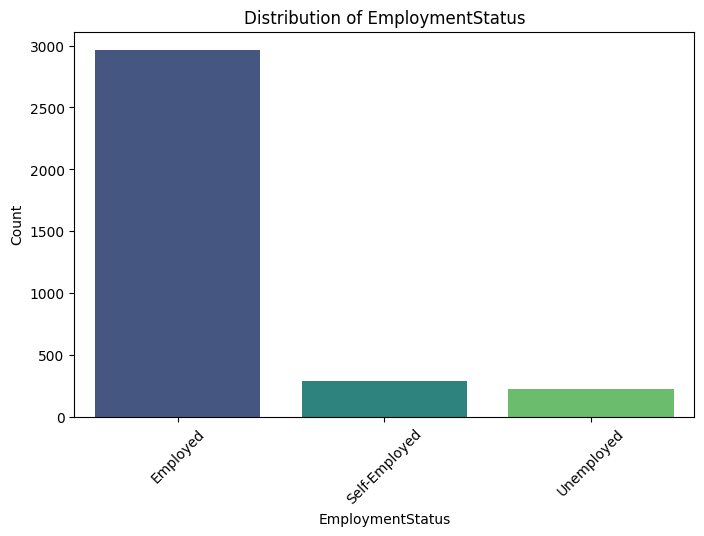

<ipython-input-96-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


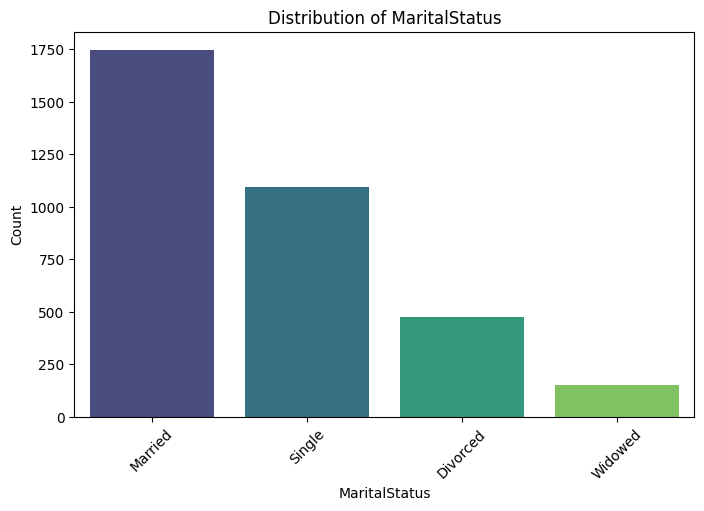

<ipython-input-96-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


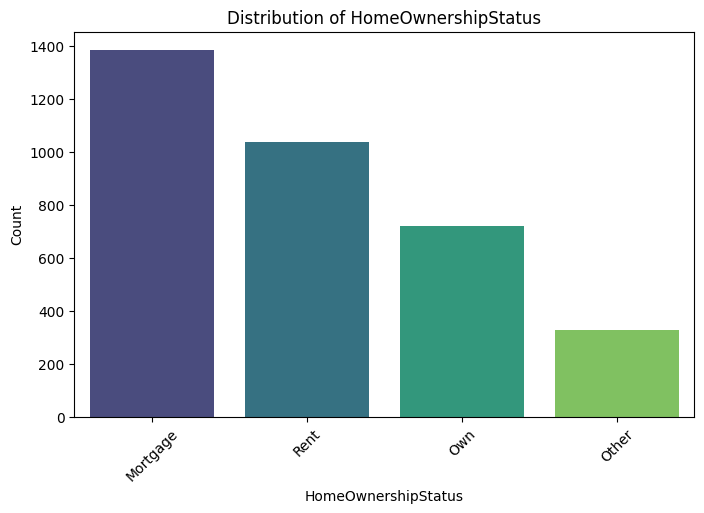

<ipython-input-96-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


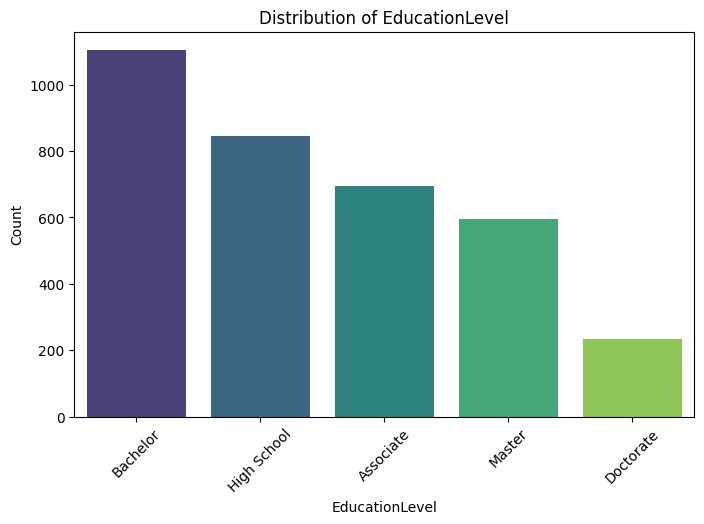

<ipython-input-96-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


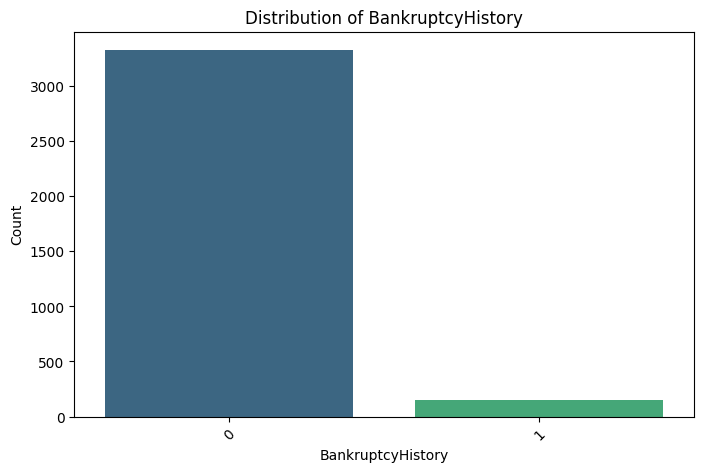

<ipython-input-96-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


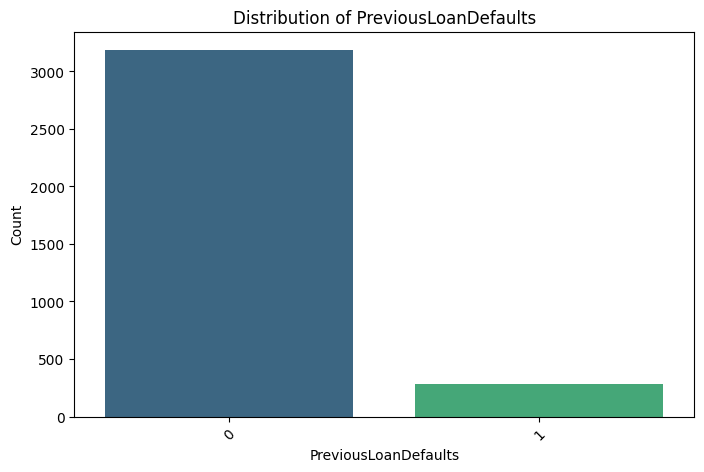

<ipython-input-96-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


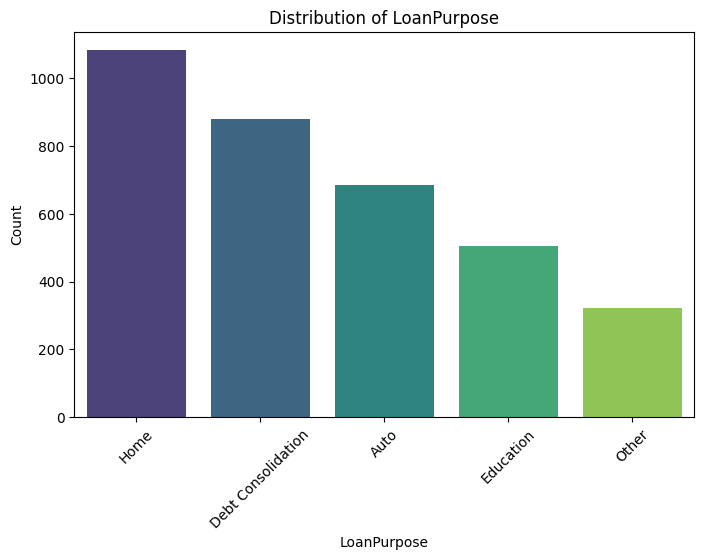

<ipython-input-96-a1bc7d548d01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


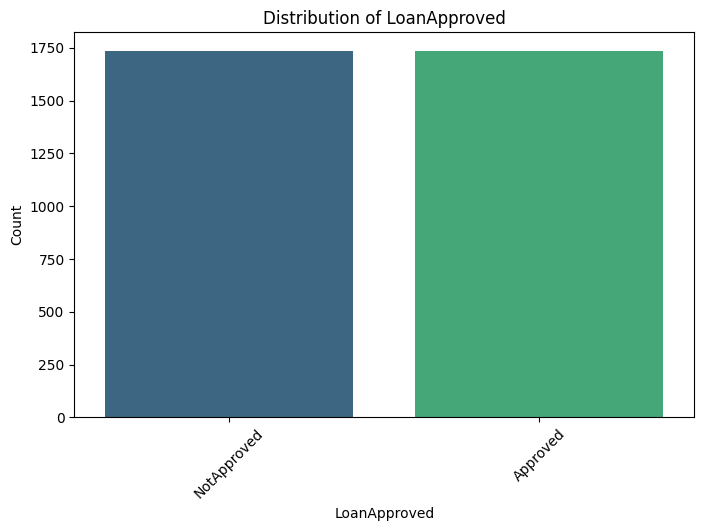

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# 막대그래프 그리기
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Normalized Crosstab for EmploymentStatus:
LoanApproved      Approved  NotApproved
EmploymentStatus                       
Employed          0.500674     0.499326
Self-Employed     0.611111     0.388889
Unemployed        0.345455     0.654545



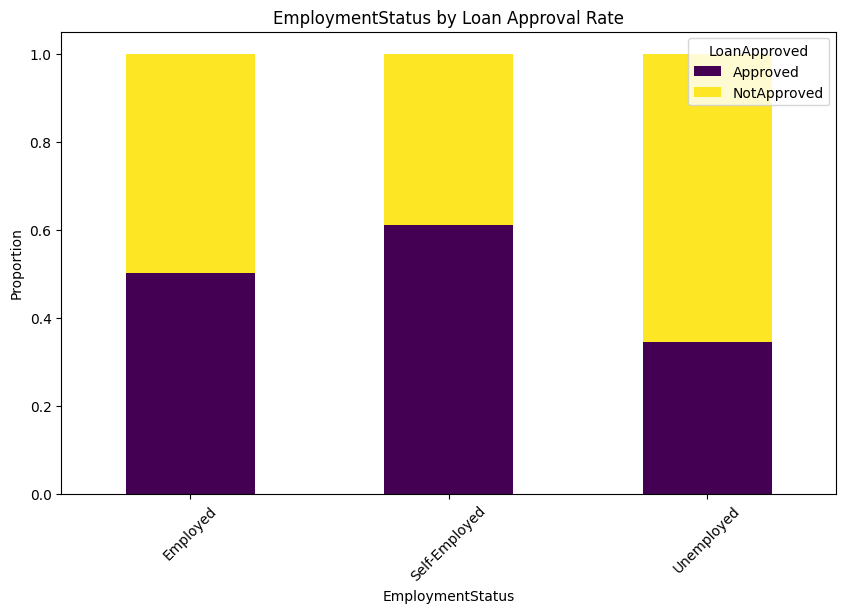

Normalized Crosstab for MaritalStatus:
LoanApproved   Approved  NotApproved
MaritalStatus                       
Divorced       0.523013     0.476987
Married        0.500000     0.500000
Single         0.489051     0.510949
Widowed        0.506494     0.493506



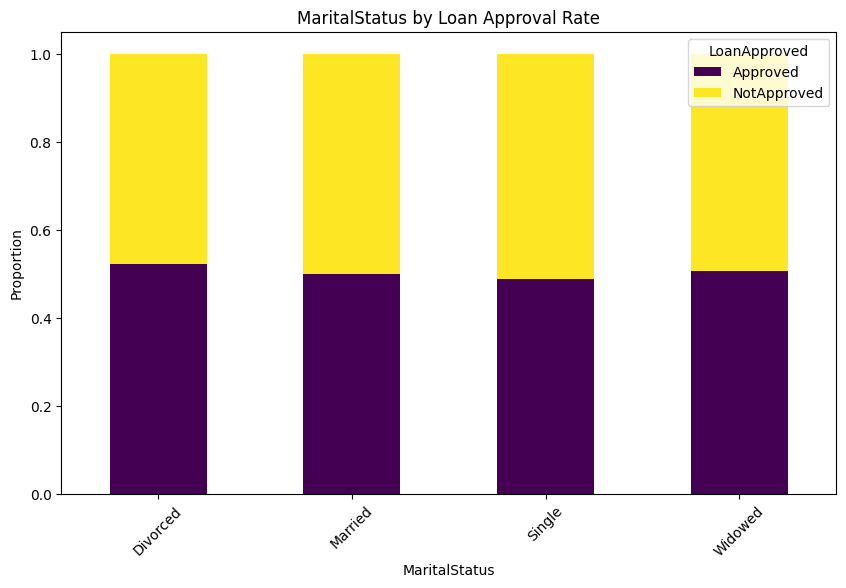

Normalized Crosstab for HomeOwnershipStatus:
LoanApproved         Approved  NotApproved
HomeOwnershipStatus                       
Mortgage             0.521645     0.478355
Other                0.442073     0.557927
Own                  0.508333     0.491667
Rent                 0.483654     0.516346



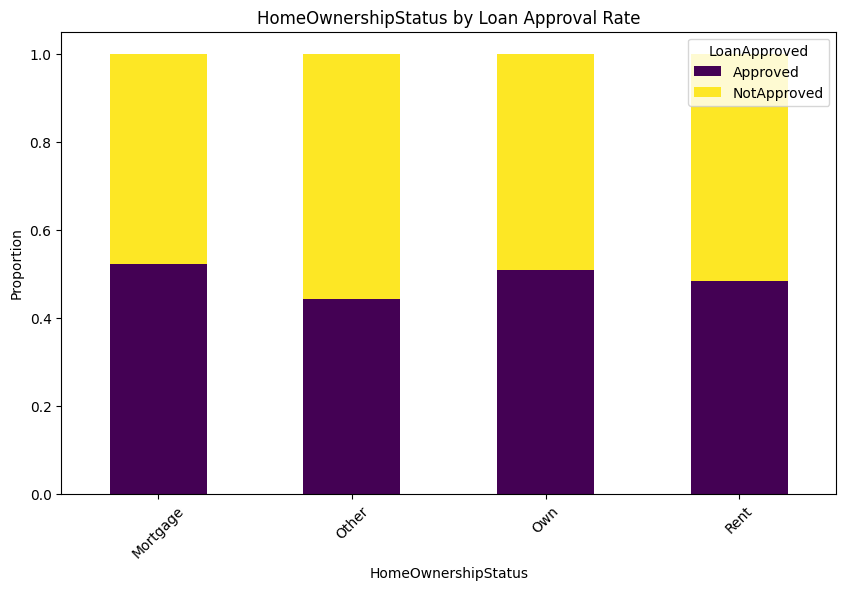

Normalized Crosstab for EducationLevel:
LoanApproved    Approved  NotApproved
EducationLevel                       
Associate       0.447482     0.552518
Bachelor        0.529891     0.470109
Doctorate       0.710638     0.289362
High School     0.340426     0.659574
Master          0.649832     0.350168



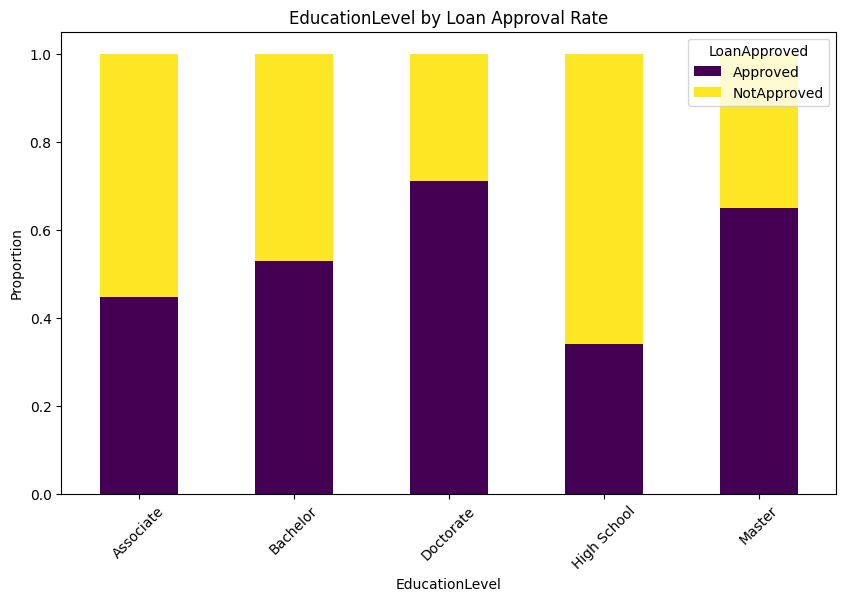

Normalized Crosstab for BankruptcyHistory:
LoanApproved       Approved  NotApproved
BankruptcyHistory                       
0                   0.51083      0.48917
1                   0.26000      0.74000



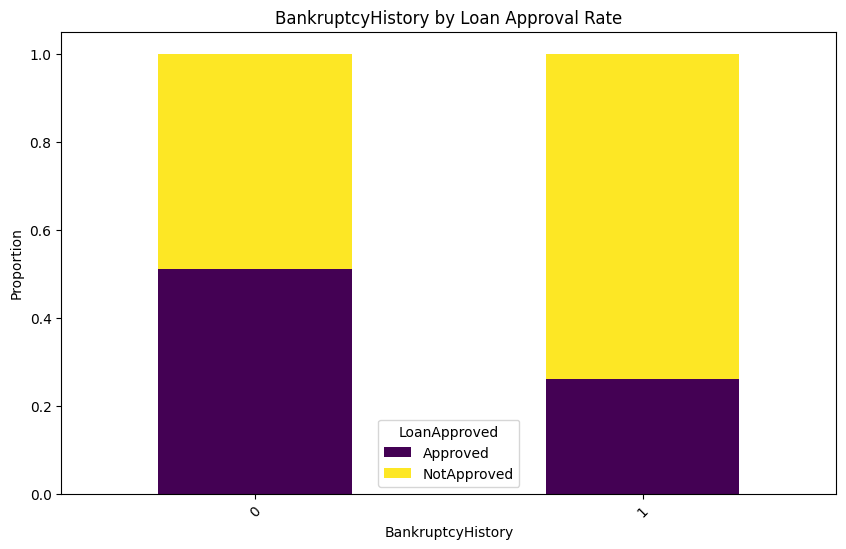

Normalized Crosstab for PreviousLoanDefaults:
LoanApproved          Approved  NotApproved
PreviousLoanDefaults                       
0                     0.512394     0.487606
1                     0.362369     0.637631



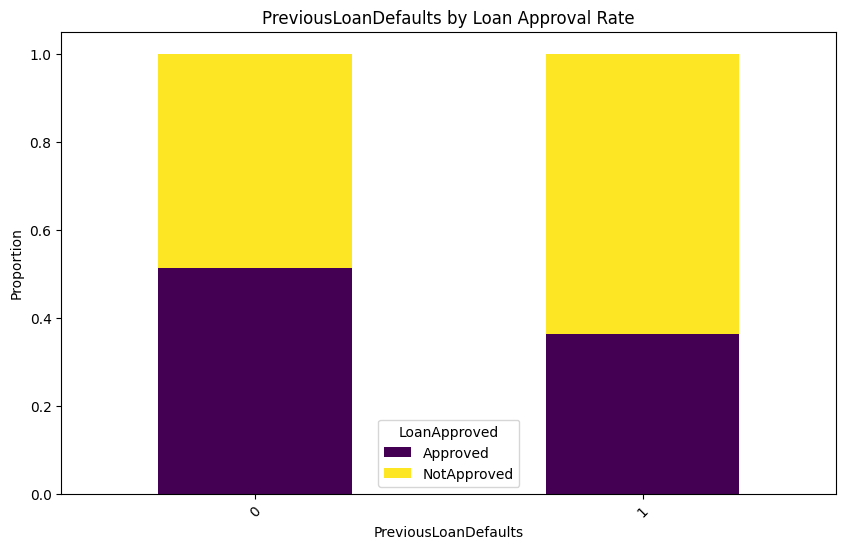

Normalized Crosstab for LoanPurpose:
LoanApproved        Approved  NotApproved
LoanPurpose                              
Auto                0.503650     0.496350
Debt Consolidation  0.476136     0.523864
Education           0.544554     0.455446
Home                0.496303     0.503697
Other               0.500000     0.500000



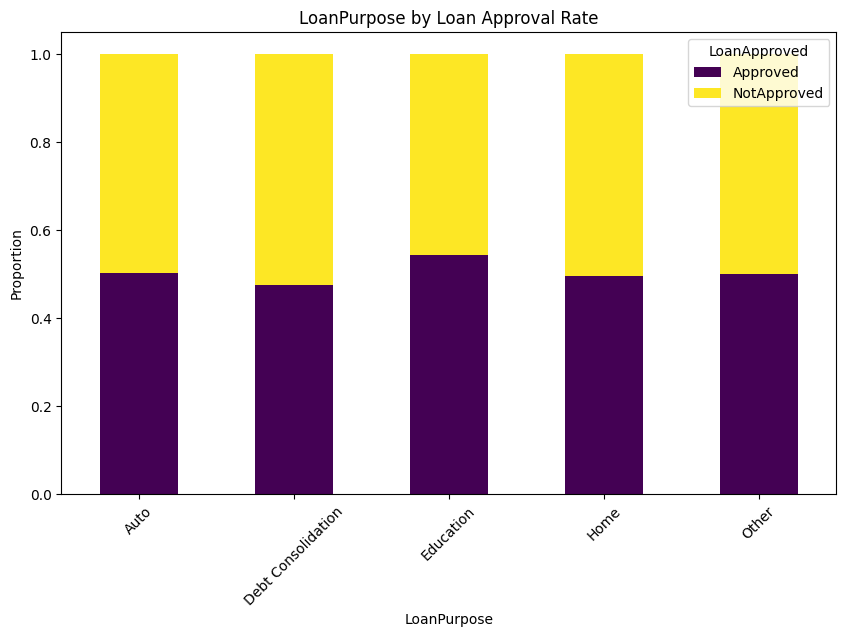

Normalized Crosstab for LoanApproved:
LoanApproved  Approved  NotApproved
LoanApproved                       
Approved           1.0          0.0
NotApproved        0.0          1.0



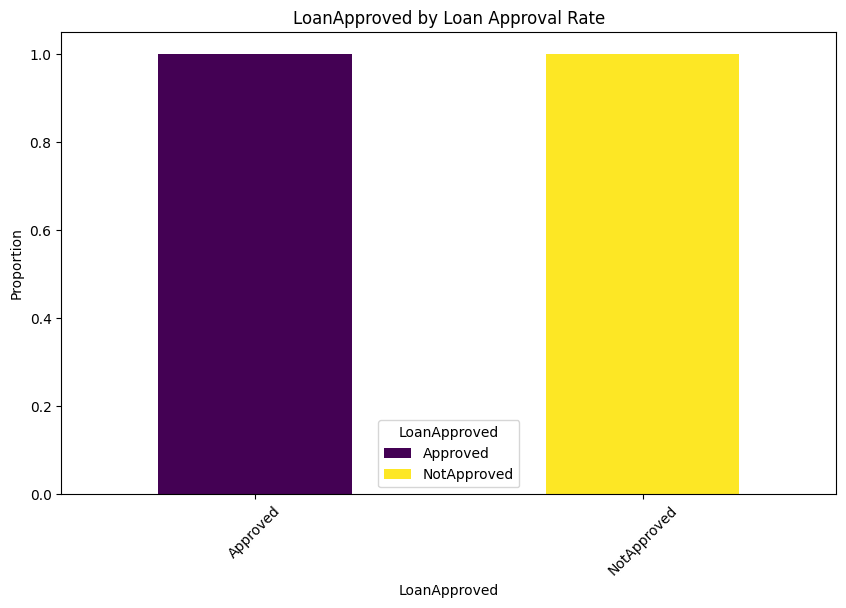

In [97]:
# 대출 승인 여부 별 범주형 변수 비율
for col in categorical_columns:
    crosstab = pd.crosstab(df[col], df['LoanApproved'], normalize='index')
    print(f"Normalized Crosstab for {col}:\n{crosstab}\n")

    # 시각화
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'{col} by Loan Approval Rate')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

In [98]:
#수치형 변수
numerical_features = df.columns[(df.dtypes == int).values | (df.dtypes == float).values]
df[numerical_features].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,AnnualIncome,CreditScore,LoanAmount
count,3474.000000,3474.000000,3474.000000,3474.000000
mean,32.009211,71304.924007,564.546344,22283.966321
std,5.130143,46941.516659,48.030005,12348.826910
min,20.000000,15000.000000,343.000000,3729.000000
25%,28.000000,36757.500000,536.000000,13737.250000
50%,33.000000,60166.500000,572.000000,19390.500000
75%,36.000000,93670.250000,601.000000,27653.750000
max,39.000000,373724.000000,672.000000,127945.000000


In [99]:
# Multiply the values in AnnualIncome and LoanAmount by the exchange rate (1,400).

exchange_rate = 1400

df['AnnualIncome'] = df['AnnualIncome'] * exchange_rate
df['LoanAmount'] = df['LoanAmount'] * exchange_rate

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,AnnualIncome,CreditScore,EmploymentStatus,MaritalStatus,HomeOwnershipStatus,EducationLevel,BankruptcyHistory,PreviousLoanDefaults,LoanAmount,LoanPurpose,LoanApproved
0,31,51826600,629,Employed,Married,Rent,Associate,0,0,49898800,Debt Consolidation,NotApproved
1,37,162663200,564,Employed,Divorced,Rent,Master,0,0,35504000,Debt Consolidation,Approved
2,32,196970200,550,Employed,Married,Rent,Bachelor,0,0,28211400,Home,Approved
3,31,50020600,587,Unemployed,Single,Mortgage,Master,0,0,52070200,Home,NotApproved
4,37,93097200,541,Employed,Married,Mortgage,Master,0,0,26933200,Auto,Approved


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    3474.000000
mean      564.546344
std        48.030005
min       343.000000
25%       536.000000
50%       572.000000
75%       601.000000
max       672.000000
Name: CreditScore, dtype: float64


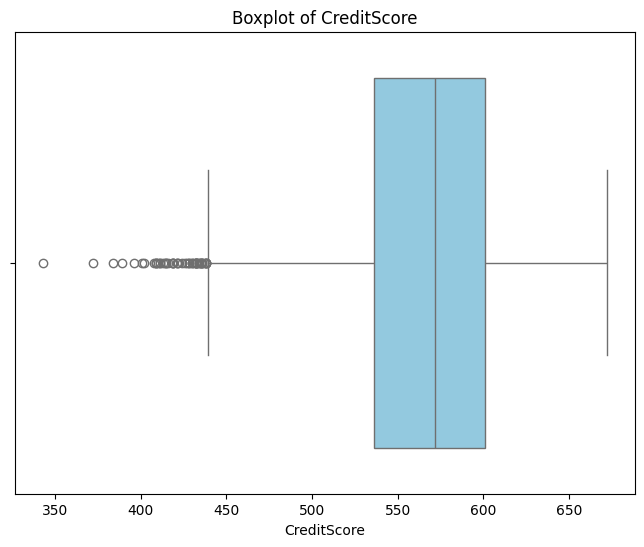

In [100]:
# CreditScore 확인
print(df['CreditScore'].describe())

# CreditScore Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CreditScore'], color='skyblue')
plt.title('Boxplot of CreditScore')
plt.xlabel('CreditScore')
plt.show()


In [101]:
# IQR 계산
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 확인
outliers = df[(df['CreditScore'] < lower_bound) | (df['CreditScore'] > upper_bound)]
print(outliers[['CreditScore', 'LoanApproved']])
print(f"이상치 개수: {outliers.shape[0]}")

# 'LoanApproved'가 'NotApproved'인 개수 확인
not_approved_count = outliers[outliers['LoanApproved'] == 'NotApproved'].shape[0]
print(f"NotApproved 개수: {not_approved_count}")

      CreditScore LoanApproved
36            432     Approved
98            436  NotApproved
109           414     Approved
252           402  NotApproved
332           438  NotApproved
399           415  NotApproved
423           430     Approved
504           416  NotApproved
577           427  NotApproved
607           421  NotApproved
662           419     Approved
761           419  NotApproved
774           424     Approved
803           436  NotApproved
833           418  NotApproved
856           389  NotApproved
928           428     Approved
988           421  NotApproved
1122          426  NotApproved
1333          438     Approved
1390          435     Approved
1427          409  NotApproved
1530          432  NotApproved
1643          409     Approved
1671          433  NotApproved
1728          434     Approved
1763          428  NotApproved
1768          432  NotApproved
1822          410     Approved
2092          432     Approved
2119          413     Approved
2160    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


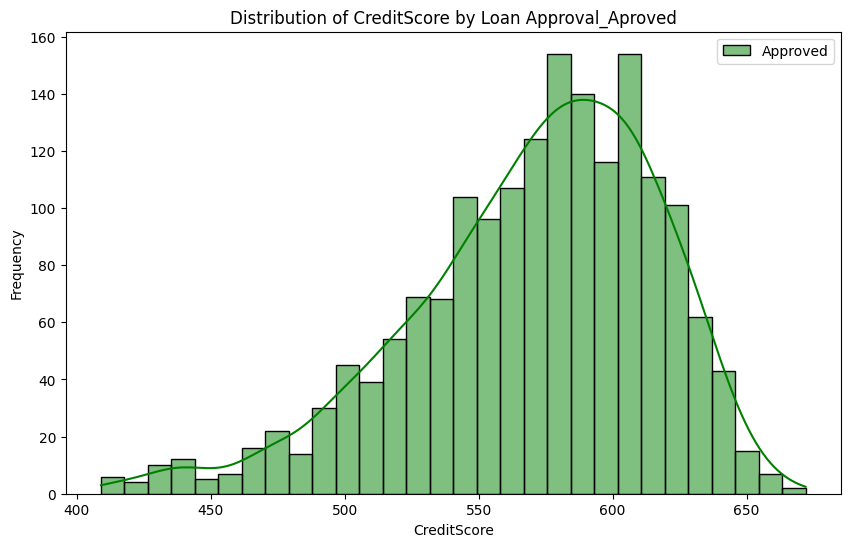

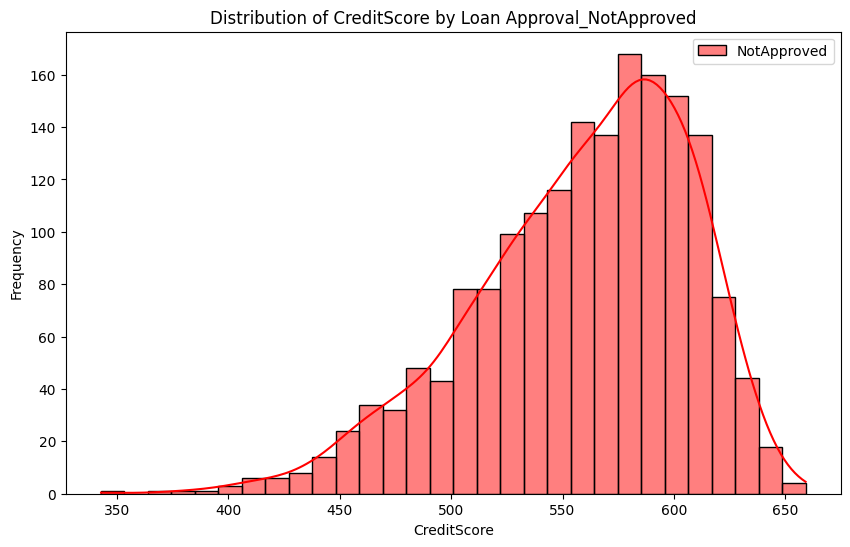

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# 대출 승인 여부에 따른 CreditScore 히스토그램 - 승인
plt.figure(figsize=(10, 6))
sns.histplot(df[df['LoanApproved'] == 'Approved']['CreditScore'], color='green', label='Approved', kde=True, bins=30)
plt.title('Distribution of CreditScore by Loan Approval_Aproved')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 대출 승인 여부에 따른 CreditScore 히스토그램 - 미승인
plt.figure(figsize=(10, 6))
sns.histplot(df[df['LoanApproved'] == 'NotApproved']['CreditScore'], color='red', label='NotApproved', kde=True, bins=30)
plt.title('Distribution of CreditScore by Loan Approval_NotApproved')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [103]:
from scipy.stats import ttest_ind

# 승인된 대출과 미승인 대출의 신용 점수
approved_scores = df[df['LoanApproved'] == 'Approved']['CreditScore']
not_approved_scores = df[df['LoanApproved'] == 'NotApproved']['CreditScore']

# T-test
t_stat, p_value = ttest_ind(approved_scores, not_approved_scores)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 7.39330150938486, P-value: 1.785885398479908e-13


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* t-test 결과 p-value가 0.05보다 작으므로, 대출 승인 여부에 따른 CreditScore의 차이는 통계적으로 유의미함.

# Credit Score

* 미국 신용점수 (FICO, VantageScore 등): 300 ~ 850

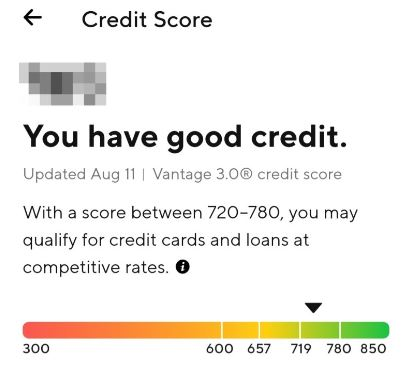


* 한국 신용점수(KCB 신용등급 기준): 350 ~ 1,000
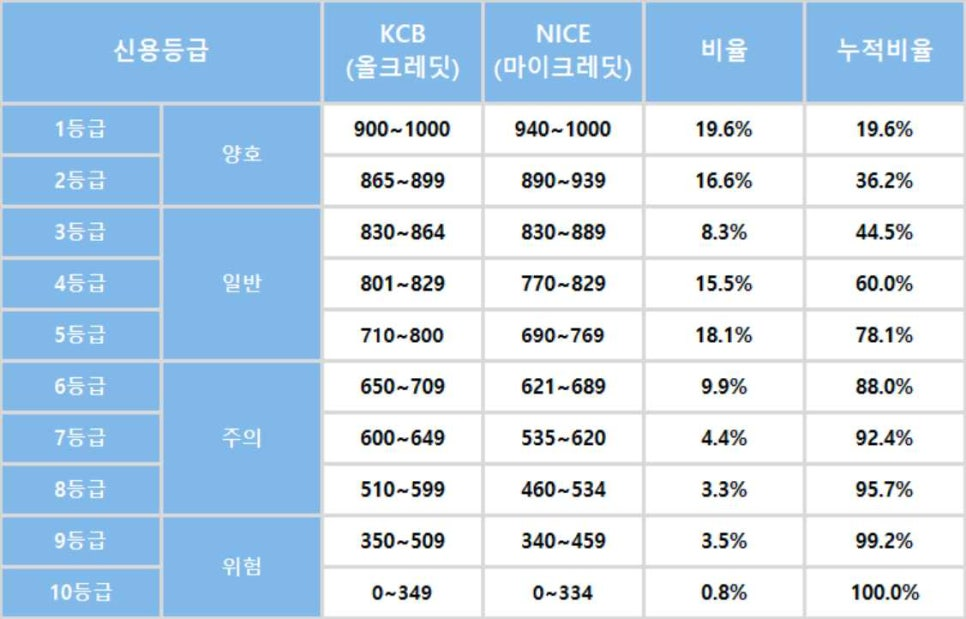

* 사회초년생의 신용점수 평균은 NICE신용점수 기준 650 ~ 700점, KCB 기준 550 ~ 650점이고 기존 신용등급(현재는 폐지) 기준 6~7 등급 정도



*** 두 범위를 맞추기 위해 선형 변환을 사용.
* 1) 미국 점수 범위 0~1 정규화하고,
  2) 정규화된 값 한국 점수 범위로 변환(최솟값 더해줘서)

* 미국 신용점수 범위(300 ~ 850)를 한국 신용점수(KCB 기준) 범위(350 ~ 1,000)로 변환하는 공식 :

  **scaled_credit_score = 350 + (credit_score-300/850-300) X (1000-350)**

In [104]:
# CreditScore USA to KOR scailing
def scale_credit_score(credit_score):
    return 350 + ((credit_score - 300) / (850 - 300)) * (1000 - 350)

df['ScaledCreditScore'] = df['CreditScore'].apply(scale_credit_score)

df[['CreditScore', 'ScaledCreditScore']].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,ScaledCreditScore
0,629,738.818182
1,564,662.000000
2,550,645.454545
3,587,689.181818
4,541,634.818182


In [105]:
import pandas as pd

# KCB 기준 등급 구간 설정
def categorize_credit_score(scaled_score):
    if scaled_score >= 890:
        return "Good"
    elif scaled_score >= 650:
        return "Average"
    elif scaled_score >= 460:
        return "Caution"
    else:
        return "Risk"

# 'ScaledCreditScore'에 따라 등급 부여
df['CreditGrade'] = df['ScaledCreditScore'].apply(categorize_credit_score)

print(df[['ScaledCreditScore', 'CreditGrade']].head())

   ScaledCreditScore CreditGrade
0         738.818182     Average
1         662.000000     Average
2         645.454545     Caution
3         689.181818     Average
4         634.818182     Caution


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CreditGrade
Average    2232
Caution    1238
Risk          4
Name: count, dtype: int64


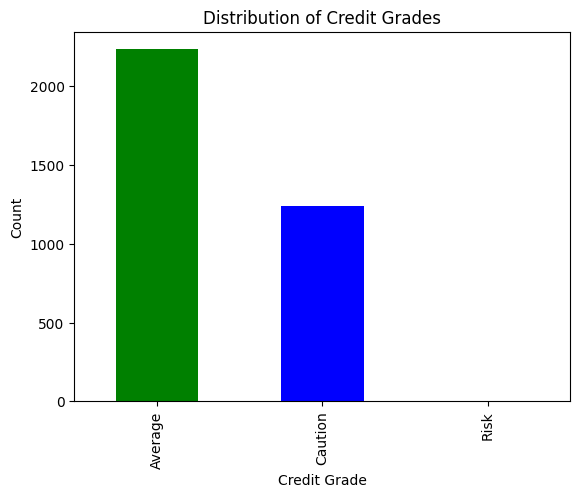

In [106]:
# CreditGrade의 분포 확인
grade_distribution = df['CreditGrade'].value_counts()
print(grade_distribution)

# 막대그래프로 시각화
grade_distribution.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.title('Distribution of Credit Grades')
plt.xlabel('Credit Grade')
plt.ylabel('Count')
plt.show()


In [107]:
# CreditGrade가 Risk인 행만 출력
risk = df[df['CreditGrade'] == 'Risk']
risk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,AnnualIncome,CreditScore,EmploymentStatus,MaritalStatus,HomeOwnershipStatus,EducationLevel,BankruptcyHistory,PreviousLoanDefaults,LoanAmount,LoanPurpose,LoanApproved,ScaledCreditScore,CreditGrade
856,30,24414600,389,Employed,Married,Other,High School,0,0,27872600,Home,NotApproved,455.181818,Risk
2309,28,45612000,384,Unemployed,Widowed,Rent,Bachelor,0,0,15456000,Education,NotApproved,449.272727,Risk
2334,31,74701200,372,Employed,Single,Own,High School,0,0,45047800,Home,NotApproved,435.090909,Risk
3104,26,48157200,343,Unemployed,Married,Own,Associate,0,0,13707400,Home,NotApproved,400.818182,Risk


* 예상대로 일반이 가장 많고, 그 다음으로 주의가 많음.
* Risk(4명)는 모두 대출 승인 여부 NotApproved임.
* 양호는 없음. - 아무래도 2030세대라 .. ?

In [108]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,AnnualIncome,CreditScore,EmploymentStatus,MaritalStatus,HomeOwnershipStatus,EducationLevel,BankruptcyHistory,PreviousLoanDefaults,LoanAmount,LoanPurpose,LoanApproved,ScaledCreditScore,CreditGrade
0,31,51826600,629,Employed,Married,Rent,Associate,0,0,49898800,Debt Consolidation,NotApproved,738.818182,Average
1,37,162663200,564,Employed,Divorced,Rent,Master,0,0,35504000,Debt Consolidation,Approved,662.000000,Average
2,32,196970200,550,Employed,Married,Rent,Bachelor,0,0,28211400,Home,Approved,645.454545,Caution
3,31,50020600,587,Unemployed,Single,Mortgage,Master,0,0,52070200,Home,NotApproved,689.181818,Average
4,37,93097200,541,Employed,Married,Mortgage,Master,0,0,26933200,Auto,Approved,634.818182,Caution
